# DSA8002 Coursework Question 2 [50 Marks]

--- 

In this assignment, you will analyze a fictional dataset of a city’s public bike rental program.

Complete the tasks below using this Jupyter notebook. For each task, you have been provided with code and markdown cells (if applicable) to enter your answers.

You may add additional code or markdown cells if required, e.g. for testing code.
    
Ensure that all code cells are **fully commented**. Code without detailed comments will lose marks.

You must import any required packages at the beginning of this notebook.

**Execute all cells before saving and submitting!**


---

In [1]:
# Import packages here
import pandas as pd               # Lets us clean, explore and analyse the data
import matplotlib.pyplot as plt   # Lets us plot and visualize the data
import sqlite3                    # Lets us run sql queries on a dataframe

---

## Task 1: Load and Explore the Data  

You are given a CSV file bike_rentals.csv with the following columns:

- `rental_id`: Unique ID for each rental
- `user_type`: "Member" or "Casual"
- `start_time`: Rental start time (YYYY-MM-DD HH:MM)
- `end_time`: Rental end time
- `start_station`: Station name where rental started
- `end_station`: Station name where rental ended
- `duration_minutes`: Duration of rental in minutes
- `bike_id`: Unique ID of the bike

Write a function called load_data() that:

- Loads the data into a Pandas DataFrame

- Parses the start_time and end_time as datetime objects

- Prints:
  - Number of rows
  - Column names and types
  - First 5 rows

**Hint**: look at the datetime arguments available within `pandas.read_csv()` -- https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Load the data and display the first five rows.

### Function:

In [2]:
#Creating the function to load the data

def load_data(filepath):
    
    df=pd.read_csv(                                 #reads the csv file and turns the start time and end time into datetime objects
        filepath,
        parse_dates=["start_time","end_time"]
    )

    #printing how many rows are there in the dataset given and making the print text bold
    print("\033[1mThe total numbers of rows are:", len(df))

    #shows up the column names and their data types
    print("\033[1m Column Names            Data types\033[0m")
    print("\n\033[1m", df.dtypes)

    #Prints the first five rows so we can see what the data looks like
    print("\n\033[1mThe first 5 rows are:\033[03m")
    display(df.head())

    return df    #returns the dataframe



### Create the dataframe and print the information using your function:

In [3]:
#Executing the created function and printing the information
bike_df = load_data("bike_rentals.csv")



The total numbers of rows are: 1103
 Column Names            Data types

 rental_id                   object
user_type                   object
start_time          datetime64[ns]
end_time            datetime64[ns]
start_station               object
end_station                 object
duration_minutes           float64
bike_id                     object
dtype: object

The first 5 rows are:


,rental_id,user_type,start_time,end_time,start_station,end_station,duration_minutes,bike_id
0,R00001,Member,2023-01-01 06:31:00,2023-01-01 06:39:00,Times Square,Times Square,8.0,B088
1,R00002,Member,2023-01-01 07:21:00,2023-01-01 07:22:00,Brooklyn Bridge,Times Square,1.0,B014
2,R00003,Casual,2023-01-01 14:36:00,2023-01-01 15:37:00,Brooklyn Bridge,Wall Street,1.0,B073
3,R00004,Member,2023-01-01 22:25:00,2023-01-01 22:28:00,Wall Street,Times Square,3.0,B018
4,R00005,Casual,2023-01-02 02:06:00,2023-01-02 02:29:00,Times Square,Union Square,23.0,B039


---

## Task 2: Clean and Process the Data

Create a function clean_data(df) that processes the data by doing the following operations:

- Drops rows where duration_minutes is missing or less than 1

- Removes duplicate rental_ids

- Fills any missing values in user_type with "Unknown"

- Creates a new column rental_day containing only the date (not time) from start_time

- Creates a new column rental_hour for the hour of day the rental started

- Prints the number of rows

- Returns the cleaned DataFrame.


### Function:

In [4]:
#Create function to cleanup the data

def clean_data(df):
    
    #Removes rows where the duration minutes are missing
    df = df.dropna(subset=["duration_minutes"])
    
    #Only keeps rows where duration_minutes is atleast one minute
    df = df[df["duration_minutes"] >= 1]
    
    #removes duplicate rental_id enteries
    df = df.drop_duplicates(subset="rental_id")

    #fills up the missing values in user_type with 'Unknown'
    df["user_type"] = df["user_type"].fillna("Unknown")

    #Extracts date from start time and creates a new column
    df["rental_day"] = df["start_time"].dt.date

    #creates rental hour as hour for start time
    df["rental_hour"] = df["start_time"].dt.hour
    
    #Prints the number of rows left after cleaning
    print(f"\n\033[1mNumber of rows after cleaning it: {len(df)}")

    return df  #returns the dataframe
    


### Execute this function and **display the first five rows**:

In [5]:
#Executing the function here
cleaned_out_df = clean_data(bike_df)

cleaned_out_df.head() #displaying the dataframe




Number of rows after cleaning it: 1098


,rental_id,user_type,start_time,end_time,start_station,end_station,duration_minutes,bike_id,rental_day,rental_hour
0,R00001,Member,2023-01-01 06:31:00,2023-01-01 06:39:00,Times Square,Times Square,8.0,B088,2023-01-01,6
1,R00002,Member,2023-01-01 07:21:00,2023-01-01 07:22:00,Brooklyn Bridge,Times Square,1.0,B014,2023-01-01,7
2,R00003,Casual,2023-01-01 14:36:00,2023-01-01 15:37:00,Brooklyn Bridge,Wall Street,1.0,B073,2023-01-01,14
3,R00004,Member,2023-01-01 22:25:00,2023-01-01 22:28:00,Wall Street,Times Square,3.0,B018,2023-01-01,22
4,R00005,Casual,2023-01-02 02:06:00,2023-01-02 02:29:00,Times Square,Union Square,23.0,B039,2023-01-02,2


---

## Task 3: Analyze with Pandas

Write a function `analyze_data()` that returns the following information in a dictionary:

- The hour of the day with the highest number of rentals

- The most popular start station

- The day of the week on which rentals are most frequent (you may need to consult the Pandas datetime documentation)

Your function must also:

- Plot a bar chart showing the average rental durations for each user type

- **Optional extra**: mark the standard deviation of rental durations for each user type on the plot


### Function:

In [6]:
# Creates function to analyze the bike rental data that return the dictionary

def analyze_data(df):

    #helps find the hour of the day with most no. of rentals
    the_hour_counts = df["rental_hour"].value_counts()
    the_busiest_hour = int(the_hour_counts.idxmax())    #finds the hour with highest number of rentals

    #helps find the most popular start station
    the_station_counts = df["start_station"].value_counts()
    the_most_popular_starting_station = the_station_counts.idxmax() #finds the most frequent starting station there is

    #helps find the which day of the week has the most rentals
    the_weekday_names = df["start_time"].dt.day_name()
    the_weekday_counts= the_weekday_names.value_counts()
    the_busiest_weekday = the_weekday_counts.idxmax()

    #plots the average rental duration for each user type with error bars
    the_usr_groups = df.groupby("user_type")["duration_minutes"]
    the_mean_duration = the_usr_groups.mean()
    the_standard_duration = the_usr_groups.std()

    #choosing custom colors for the bars: adjusting if there are more user types
    the_colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251", "#B565A7"][:len(the_mean_duration)]
    

    #plotting the figure
    plt.figure(figsize=(10,7))
    plt.bar(
        the_mean_duration.index,
        the_mean_duration.values,
        yerr=the_standard_duration.values,
        color=the_colors,
        capsize=5,
        edgecolor="black"
    )

    #Adding Labels to the graph
    plt.xlabel("The User Type", fontweight = "bold", fontsize=12)
    plt.ylabel("The Average Rental Duration(min)",
               fontweight="bold", fontsize=12)
    plt.title("The Average Rental Duration by the User Type",
              fontweight="bold", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.show()

    #printing the analysis summary for quick reference
    print("\n The Analysis Summary:")
    print(f" Hour with the most rentals is        :{the_busiest_hour}:00")
    print(f" The Most popular starting station is :{the_most_popular_starting_station}")
    print(f" The Busiest day of the week is       :{the_busiest_weekday}")

    #return the result in form of a dictionary as expected from the information
    return{
        "the_busiest_hour":the_busiest_hour,
        "the_most_popular_starting_station": the_most_popular_starting_station,
        "the_busiest_weekday":the_busiest_weekday
    }



### Create the plot using your function:

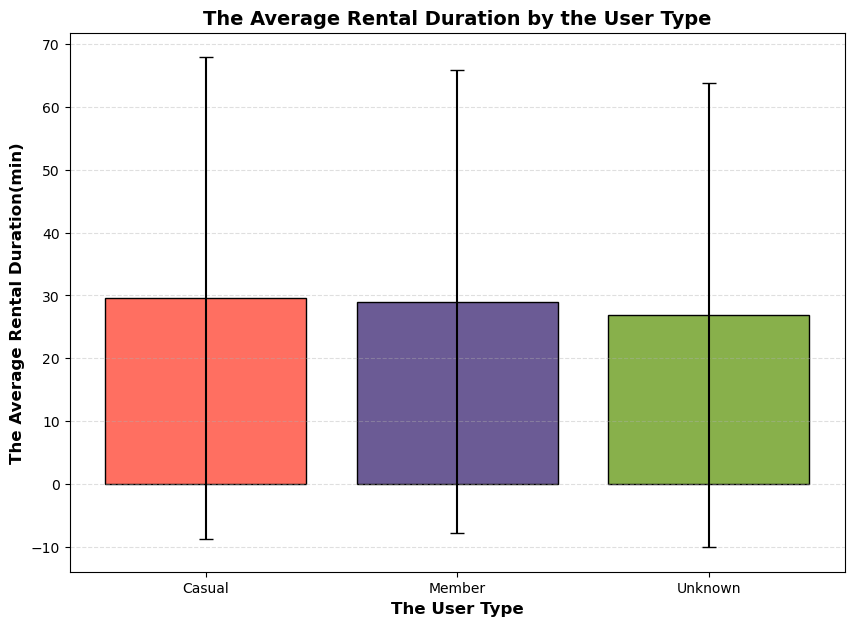


 The Analysis Summary:
 Hour with the most rentals is        :21:00
 The Most popular starting station is :Central Park
 The Busiest day of the week is       :Tuesday


{'the_busiest_hour': 21,
 'the_most_popular_starting_station': 'Central Park',
 'the_busiest_weekday': 'Tuesday'}

In [7]:
#Executing the created function and plotting the graph
the_busiest = analyze_data(cleaned_out_df)
the_busiest

### Comment on your plot: are the differences between user times significant? Justify your answer

Based on my plot, all the three user types - Casual, Memberm and Unknown have similar average rental durations, with the means clustered aroung the same value. The error bars that represents the standard deviation are very large for each of the group and almost overlap completely.This also tells that the individual rental times within each user type varies a lot and there is no clear separation b/w the groups.Because the error bars for Casual,Member and Unknow are about the same size and do overlap so much, it wouldn't be reasonable to conclude that any group has a meaningfully higher or lower average rental duration just from the plot.The variation within the user types is much more bigger than any difference in their respective means. Overall all the user types in the bar chart show a high level of variability in rental durations, and the differences b/w their average rental times don't appear to be significant based on the visual alone.

---

## Task 4: Query with SQL 

## (a)
Write a function `run_sql_queries()` that runs the following queries on the dataframe and prints the results:

- Select the total number of rentals

- Find the average rental duration for "Casual" users

- Count how many rentals started and ended at the same station

- List all distinct bike IDs used in April

**Hint**: You may need to use the SQL strftime funtion -- https://www.w3resource.com/sqlite/sqlite-strftime.php

### Function:

In [8]:

def run_sql_queries(df):
    
     #creates an memomry in database
    connect = sqlite3.connect(":memory:")

    #writing the dataframe to a sql table called bike rentals
    df.to_sql("bike_rental",connect, index=False, if_exists="replace")
    cursor_obj = connect.cursor()  #creates a cursor object to send sql commands to database and fetch the resultss

    #Fetching total number of rentals using dynamic query
    query_total_rentals = "SELECT COUNT(*) FROM bike_rental;"
    cursor_obj.execute(query_total_rentals)
    the_total_no_rentals = cursor_obj.fetchone()[0]    #returns the one row as tuple with first value from the tuple

    #printing the total number of rentals
    print(f"\033[1mThe total number of rentals: {the_total_no_rentals}")

    #fetching average rental duration for Casual users and printing the results
    query_casual_users = "SELECT AVG(duration_minutes) FROM bike_rental WHERE user_type ='Casual';"
    cursor_obj.execute(query_casual_users)
    the_avg_casual_user = cursor_obj.fetchone()[0]
    print(f"\033[1mThe Average rental duration for 'Casual' users: {the_avg_casual_user:.2f} minutes")

    #fetching the number of rentals that started and ended at the same station and printing the results
    query_start_end_same = "SELECT COUNT(*) FROM bike_rental WHERE start_station = end_station;"
    cursor_obj.execute(query_start_end_same)
    the_same_station = cursor_obj.fetchone()[0]
    print(f"\033[1mThe Rentals that started and ended at same station: {the_same_station}")

    #fetching the distinct bike ids used in the month of april and printing the results
    query_april = "SELECT DISTINCT bike_id FROM bike_rental WHERE strftime('%m',start_time) = '04';"
    cursor_obj.execute(query_april)
    the_april_bikes = cursor_obj.fetchall()
    the_april_bikes = [row[0] for row in the_april_bikes]
    print(f"The Distinct bike ids used in month of April:")
    print(the_april_bikes)

    connect.close()

    



### Execute your function:

In [9]:
#executing the function
fetch_queries = run_sql_queries(cleaned_out_df)


The total number of rentals: 1098
The Average rental duration for 'Casual' users: 29.56 minutes
The Rentals that started and ended at same station: 296
The Distinct bike ids used in month of April:
['B098', 'B043', 'B059', 'B042', 'B026', 'B009', 'B024', 'B083', 'B016', 'B019', 'B092', 'B094', 'B005', 'B047', 'B008', 'B007', 'B020', 'B001', 'B031', 'B040', 'B076', 'B032', 'B036', 'B003', 'B027', 'B095', 'B002', 'B055', 'B070', 'B010', 'B049', 'B039', 'B072', 'B088', 'B063', 'B030', 'B066', 'B048', 'B054', 'B057', 'B096', 'B056', 'B086', 'B053', 'B087', 'B015', 'B058', 'B035', 'B044', 'B037', 'B017', 'B073', 'B069', 'B038', 'B093', 'B089', 'B078', 'B068', 'B097', 'B013', 'B012', 'B060', 'B075', 'B052', 'B100', 'B034', 'B091', 'B025', 'B014', 'B033', 'B067', 'B006', 'B079', 'B045', 'B021', 'B004', 'B077', 'B061', 'B090']


---

## (b)

The file bike_info.csv contains more information about the bikes that are available to rent. It contains the following columns:

- `bike_id`: this is the same ID code used in the rentals database
- `colour`
- `year`

Write and execute an SQL query to determine the most common colour of bike collected by **Members** from the station **Brooklyn Bridge**.

### Read the file bike_info.csv and display the first 5 rows:

In [10]:
#Extracting and reading the csv file
bike_information = pd.read_csv("bike_info.csv")

bike_information.head()

,bike_id,colour,year
0,B083,black,2020
1,B002,blue,2019
2,B076,black,2021
3,B060,blue,2019
4,B051,red,2020


### Your query:

In [11]:
connect = sqlite3.connect(":memory:")

#writing the dataframe to a sql table called bike rentals
cleaned_out_df.to_sql("bike_rentals", connect, index=False, if_exists="replace")
bike_information.to_sql("bike_info", connect, index=False, if_exists="replace")
cursor_obj = connect.cursor()

#Framing the query to fetch the most common colour of bike collected by Members from the station Brooklyn Bridge.

query_brooklyn = """
SELECT bi.colour,
       COUNT(*) AS number_of_rentals
FROM bike_rentals r
JOIN bike_info AS bi
  ON r.bike_id = bi.bike_id
WHERE r.user_type = 'Member'
  AND r.start_station = 'Brooklyn Bridge'
GROUP BY bi.colour
ORDER BY number_of_rentals DESC
LIMIT 1;
"""
cursor_obj.execute(query_brooklyn)
the_most_color = cursor_obj.fetchone()

print("\n\033[1mMost common bike colour for Members starting at 'Brooklyn Bridge':\033[0m")
display(the_most_color)




Most common bike colour for Members starting at 'Brooklyn Bridge':


('black', 33)

---

## (c)

Write an SQL query that finds the average rental duration for each bike ID, returning **only** those bikes where the average rental time is less than 20 minutes.

### Your query:

In [12]:
connect = sqlite3.connect(":memory:")

#writing the dataframe to a sql table called bike rentals
cleaned_out_df.to_sql("bike_rentals", connect, index=False, if_exists="replace")
cursor_obj = connect.cursor()

#creating dynamic string to fetch the bikes where avg rental time is less than 20 min
query_avg_rental_dur = "SELECT bike_id, AVG(duration_minutes) AS avg_duration FROM bike_rentals GROUP BY bike_id HAVING avg_duration <20;"
cursor_obj.execute(query_avg_rental_dur)
the_short_rentals = cursor_obj.fetchall()

#printing the data fetched
print("\n\033[1mThese are the bikes with average rental duration less than 20 min:")

#using for loop to print more beautifully
for bike_id, avg_duration in the_short_rentals:
    print(f"\033[1m Bike Number: {bike_id} = {avg_duration:2f} minutes")


cursor_obj.close()





These are the bikes with average rental duration less than 20 min:
 Bike Number: B009 = 15.000000 minutes
 Bike Number: B012 = 16.111111 minutes
 Bike Number: B015 = 19.428571 minutes
 Bike Number: B018 = 11.272727 minutes
 Bike Number: B024 = 12.875000 minutes
 Bike Number: B028 = 15.875000 minutes
 Bike Number: B044 = 13.142857 minutes
 Bike Number: B045 = 13.454545 minutes
 Bike Number: B046 = 19.000000 minutes
 Bike Number: B047 = 17.333333 minutes
 Bike Number: B048 = 14.000000 minutes
 Bike Number: B050 = 18.571429 minutes
 Bike Number: B058 = 17.583333 minutes
 Bike Number: B059 = 17.571429 minutes
 Bike Number: B061 = 17.500000 minutes
 Bike Number: B069 = 18.076923 minutes
 Bike Number: B072 = 16.400000 minutes
 Bike Number: B077 = 17.636364 minutes
 Bike Number: B080 = 18.600000 minutes
 Bike Number: B081 = 11.333333 minutes
 Bike Number: B082 = 14.000000 minutes
 Bike Number: B096 = 18.125000 minutes
 Bike Number: B097 = 19.923077 minutes
 Bike Number: B098 = 19.705882 minu

---

## Task 5: Understanding outliers

## (a)

Write code in Python or SQL to create a dataframe that contains any bike rentals with an unusually long duration. 

It is up to you to decide how to define an unusually long duration.

You may find it helpful to use an appropriate plot in justifying your decision.

### Your code:

The 95th percentile of duration: 124.1 minutes
 The number of unusually long rentals: 55


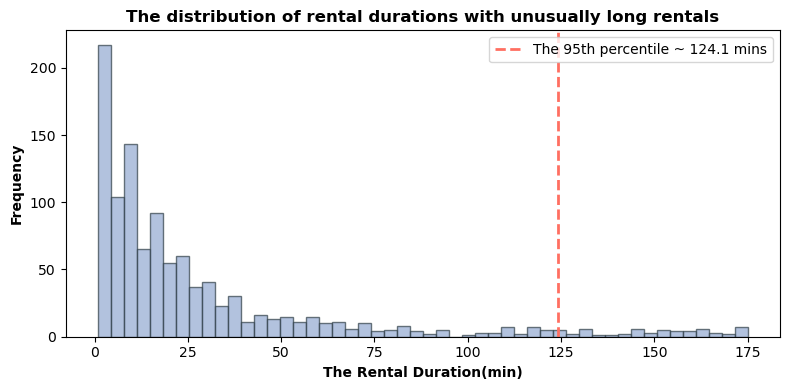

In [13]:
#using SQL to create the dataframe

cursor_obj = connect.cursor()
#I am taking long rental duration as top 5% of duration using the 95th percentile
#I have define unusually long rentals as those above the 95th percentile of the duration distribution mean top 5% of trips are usually long
#this query is to approximate the 95th percentile of duration_minutes using the Percent_Rank() window function,
#first it computes a percentile rank for each rental, then selects the minimum duration among those with percentile rank ≥ 0.95 as an estimate of the 95th‑percentile threshold.  
query_long_rentals = """
SELECT percentile_95 FROM 
(SELECT duration_minutes, PERCENT_RANK() OVER(ORDER BY duration_minutes) AS percent FROM bike_rentals)
JOIN(SELECT MIN(duration_minutes) AS percentile_95 FROM
(SELECT duration_minutes,PERCENT_RANK() OVER(ORDER BY duration_minutes) AS percent FROM bike_rentals)
WHERE pr >= 0.95) AS time ON 1=1 Limit 1;
"""
percentile_95 = cleaned_out_df["duration_minutes"].quantile(0.95)
print(f"The 95th percentile of duration: {percentile_95:.1f} minutes")

#fetching the longest time for unusally long rental
query_longest_time = f"SELECT * FROM bike_rentals WHERE duration_minutes >={percentile_95};"
the_long_rental_df = pd.read_sql_query(query_longest_time,connect)
print(f" The number of unusually long rentals: {len(the_long_rental_df)}")
the_long_rental_df.head()

#plotting the histogram for rental durations with unusually long rentals
plt.figure(figsize=(8,4))
plt.hist(cleaned_out_df["duration_minutes"], bins=50,
        color = "#92A8D1", edgecolor="#2F3E46", alpha=0.7)
plt.axvline(percentile_95, color="#FF6F61",
            linestyle="--", linewidth=2,
            label=f"The 95th percentile ~ {percentile_95:.1f} mins"
           )
plt.xlabel("The Rental Duration(min)", fontweight="bold")
plt.ylabel("Frequency", fontweight="bold")
plt.title("The distribution of rental durations with unusually long rentals", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()



### Explain how you decided on your definition of an unusually long rental:

The way I have defined an unusually long rental as one whose duration is above the 95th percentile of all the rental duration i.e top 5% of trips. This particular cutoff is a common and robust way to identify outliers because it only classifies the most extreme values as unusal, in my case its 124.1 mins to classify as unusually long rental and it is not dependent on assumptions about the shape of the data distribution. I have chosen 95th percentile after inspecting the shape of all durations to make sure the cutoff focused on the long tail rather than normal trips.The above plots shows a histogram of all the trip durations, most of the rentals are clustered well below 60min with the frequency droping as the duration increases, the orange dashed line marks the 95th percentile, only a fraction of trips extend beyond this threshold.Most of the those 55 outliers(The number of unusually long rentals) are spread across the right tail.

## (b)

Use your dataframe from part **(a)**, and write Python or SQL code to investigate which factors (i.e. columns) in the dataset are most associated with unusually long rental durations.

Create an appropriate plot that illustrates your findings.


### Your code to analyse the data:

In [14]:
#The proportion of each user_type in the data set
query_all_user = "SELECT user_type,COUNT(*) * 1.0 / (SELECT COUNT(*) FROM bike_rentals) AS share_all_rentals FROM bike_rentals GROUP BY user_type;"

#Reading the results into the dataframe
df_all_user = pd.read_sql_query(query_all_user, connect)

#What is the proportion of each user type among unusually long rentals
#reusing the same definition as in part (a) duration >= 95th percentile
query_user_long = f"""
SELECT user_type,
       COUNT(*) * 1.0 / (
           SELECT COUNT(*)
           FROM bike_rentals
           WHERE duration_minutes >= {percentile_95}
       ) AS share_long_rentals
FROM bike_rentals
WHERE duration_minutes >= {percentile_95}
GROUP BY user_type;
"""
df_long_user = pd.read_sql_query(query_user_long, connect)

#Combining the two results into a single dataframe for comparison
user_compare = df_all_user.merge(df_long_user, on="user_type", how="outer").fillna(0)
user_compare = user_compare.set_index("user_type")

#Inspecting the table
print(user_compare)



           share_all_rentals  share_long_rentals
user_type                                       
Casual              0.485428            0.545455
Member              0.467213            0.400000
Unknown             0.047359            0.054545


### Your code to produce an informative plot:

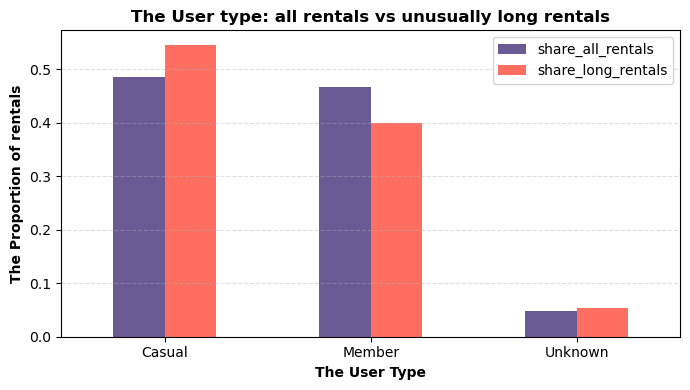

In [15]:
#Creating a bar plot for comparing proportions for each user type

fig, ax =plt.subplots(figsize=(7, 4))

#plotting both proportions on the same axes
user_compare.plot(kind="bar", color=["#6B5B95", "#FF6F61"],ax=ax)

#Adding axis labels and title
ax.set_ylabel("The Proportion of rentals", fontweight="bold")
ax.set_xlabel("The User Type", fontweight="bold")
ax.set_title("The User type: all rentals vs unusually long rentals", fontweight="bold")

plt.xticks(rotation=0)

#Adding light horizontal grid line to help compare the heights
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


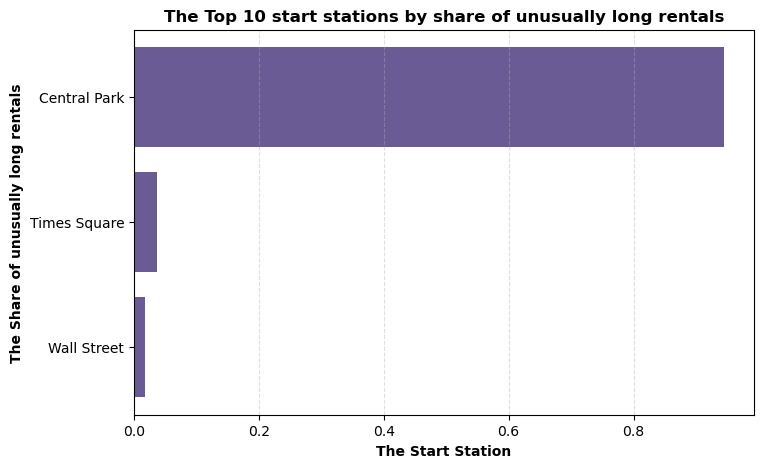

In [16]:
#plotting the top 10 start station proportion of long rentals 
#quering the top 10 start stations
query_station = f"""
SELECT start_station,
       COUNT(*) * 1.0 / (
           SELECT COUNT(*)
           FROM bike_rentals
           WHERE duration_minutes >= {percentile_95}
       ) AS share_long_rentals
FROM bike_rentals
WHERE duration_minutes >= {percentile_95}
GROUP BY start_station
ORDER BY share_long_rentals DESC
LIMIT 10;
"""
top_stations = pd.read_sql_query(query_station,connect)
top_stations

#plotting the graph
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(
    top_stations["start_station"],
    top_stations["share_long_rentals"],
    color="#6B5B95"
)
ax.set_ylabel("The Share of unusually long rentals", fontweight="bold")
ax.set_xlabel("The Start Station", fontweight="bold")
ax.set_title("The Top 10 start stations by share of unusually long rentals", fontweight="bold")

plt.gca().invert_yaxis() #so the highest is at the top
plt.grid(axis="x", linestyle="--",alpha=0.4)
plt.show()



### Which factor(s) appear to be most important? Suggest a plausible reason why the factor(s) you have identified might lead to longer rental durations

From the above plot, user_type appears to be the most important factor associated with unusually long rentals durations, In particular, the share of long rentals is noticeably higher for Casual users compared to their overall share in the dataset.Casual users are more likely to be tourist or infrequent riders, so they may use the bikes for longer durations for sightseeing purpose or trips.In contract the regular members are more likley to use the service for travel like commuting to work which natrually leads to shorter and more consistent rental durations.